In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
 

In [5]:
df= pd.read_csv("Loan_Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


sum of missing values

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

creating new colum "loanAmount_log"

<Axes: >

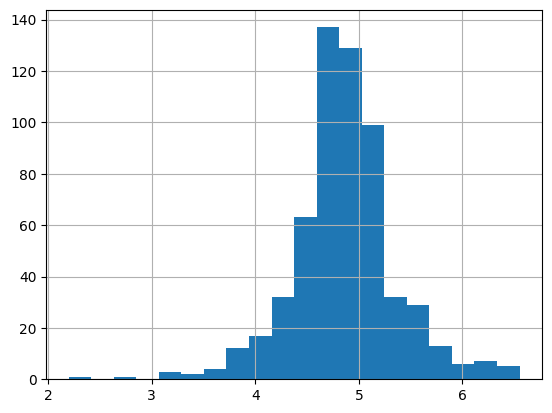

In [10]:
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

Adding new column named "TotalIncome"

<Axes: >

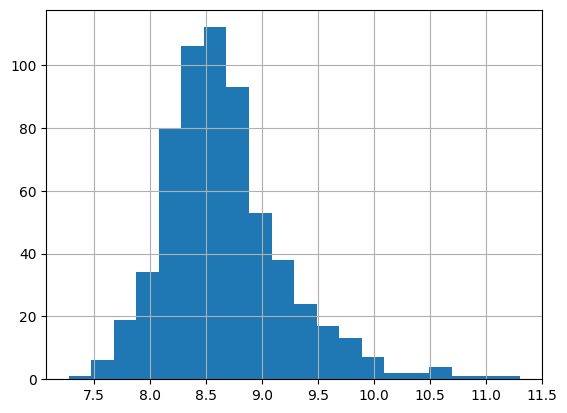

In [12]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

filling Null Values

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

Visualization

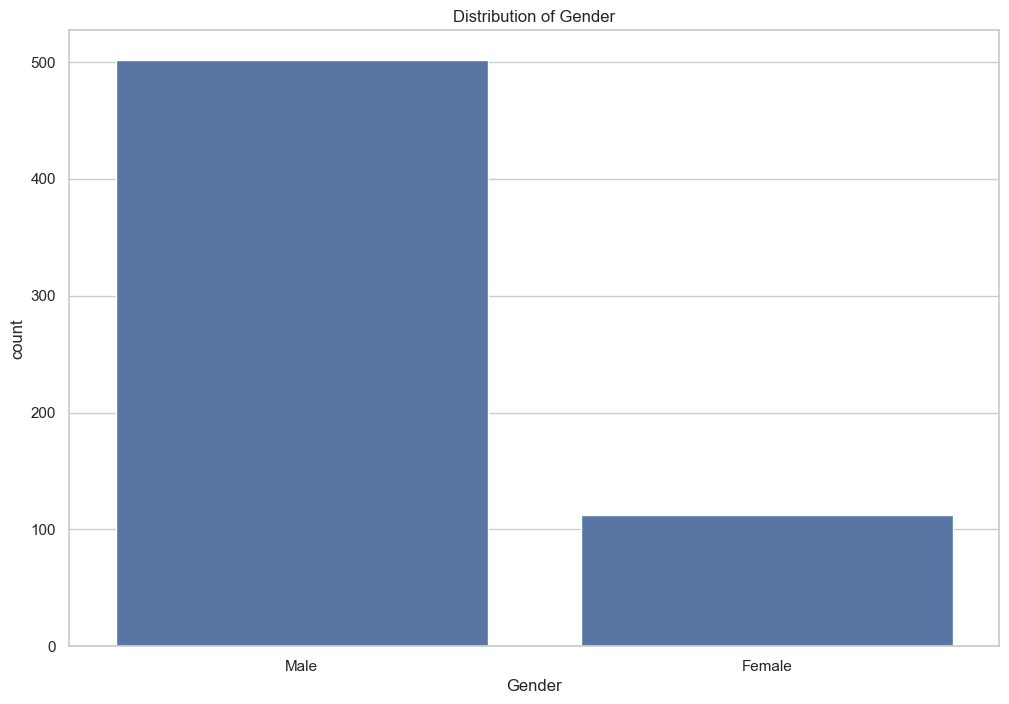

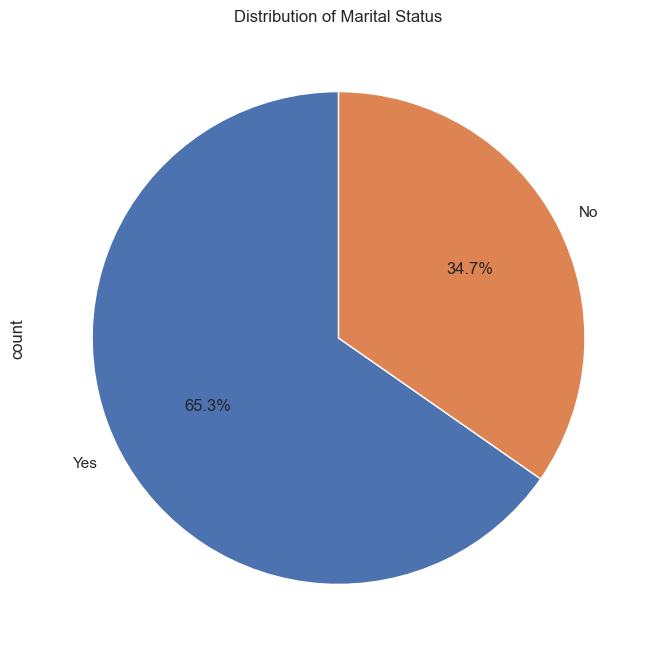

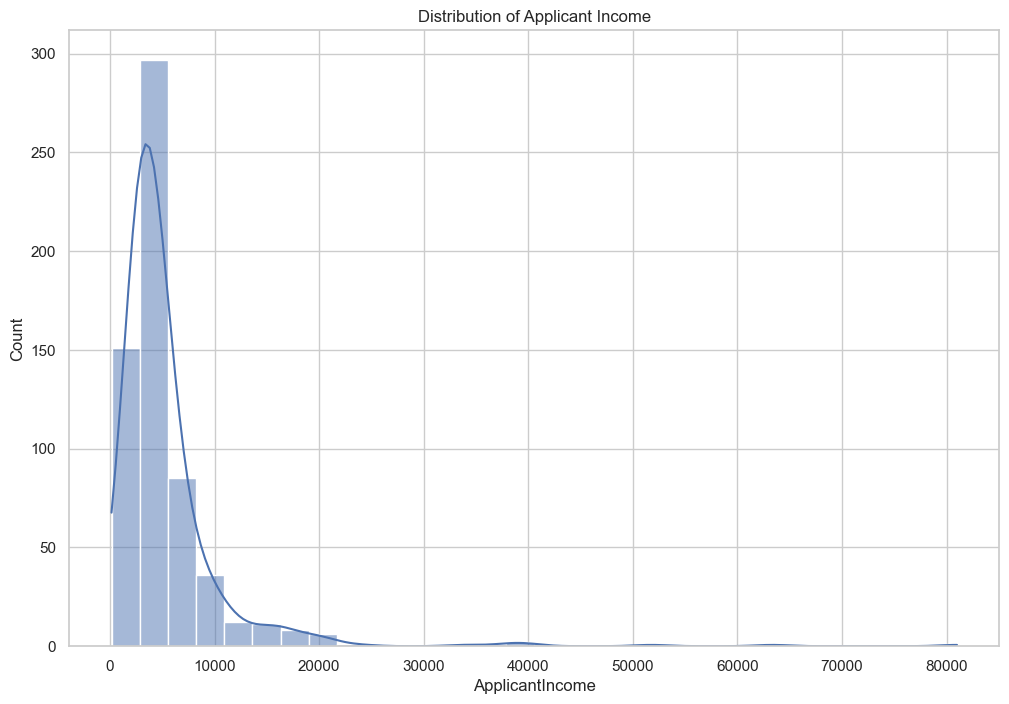

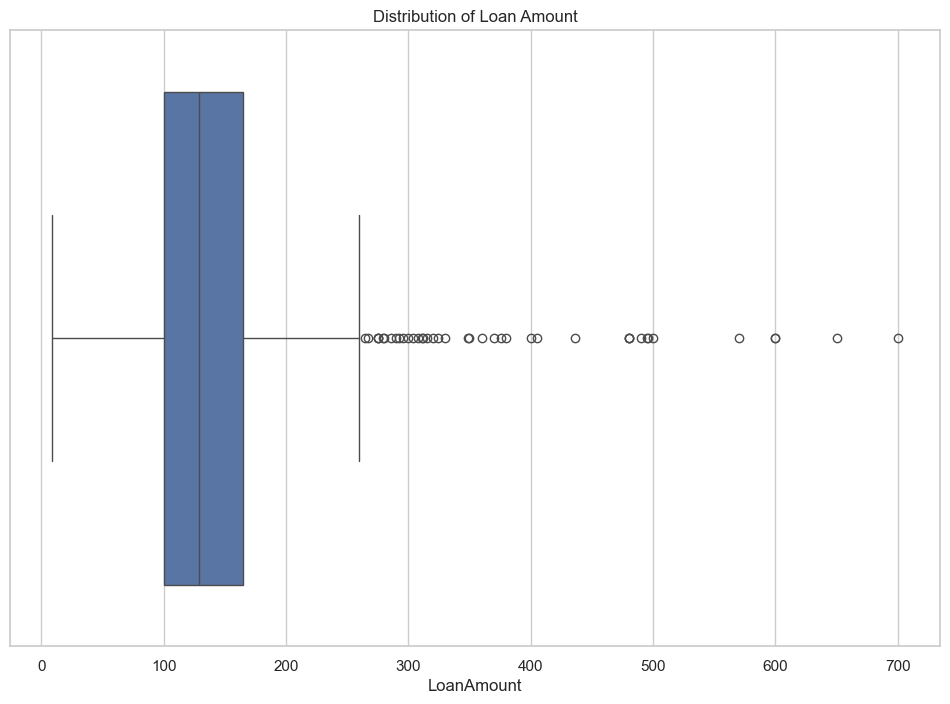

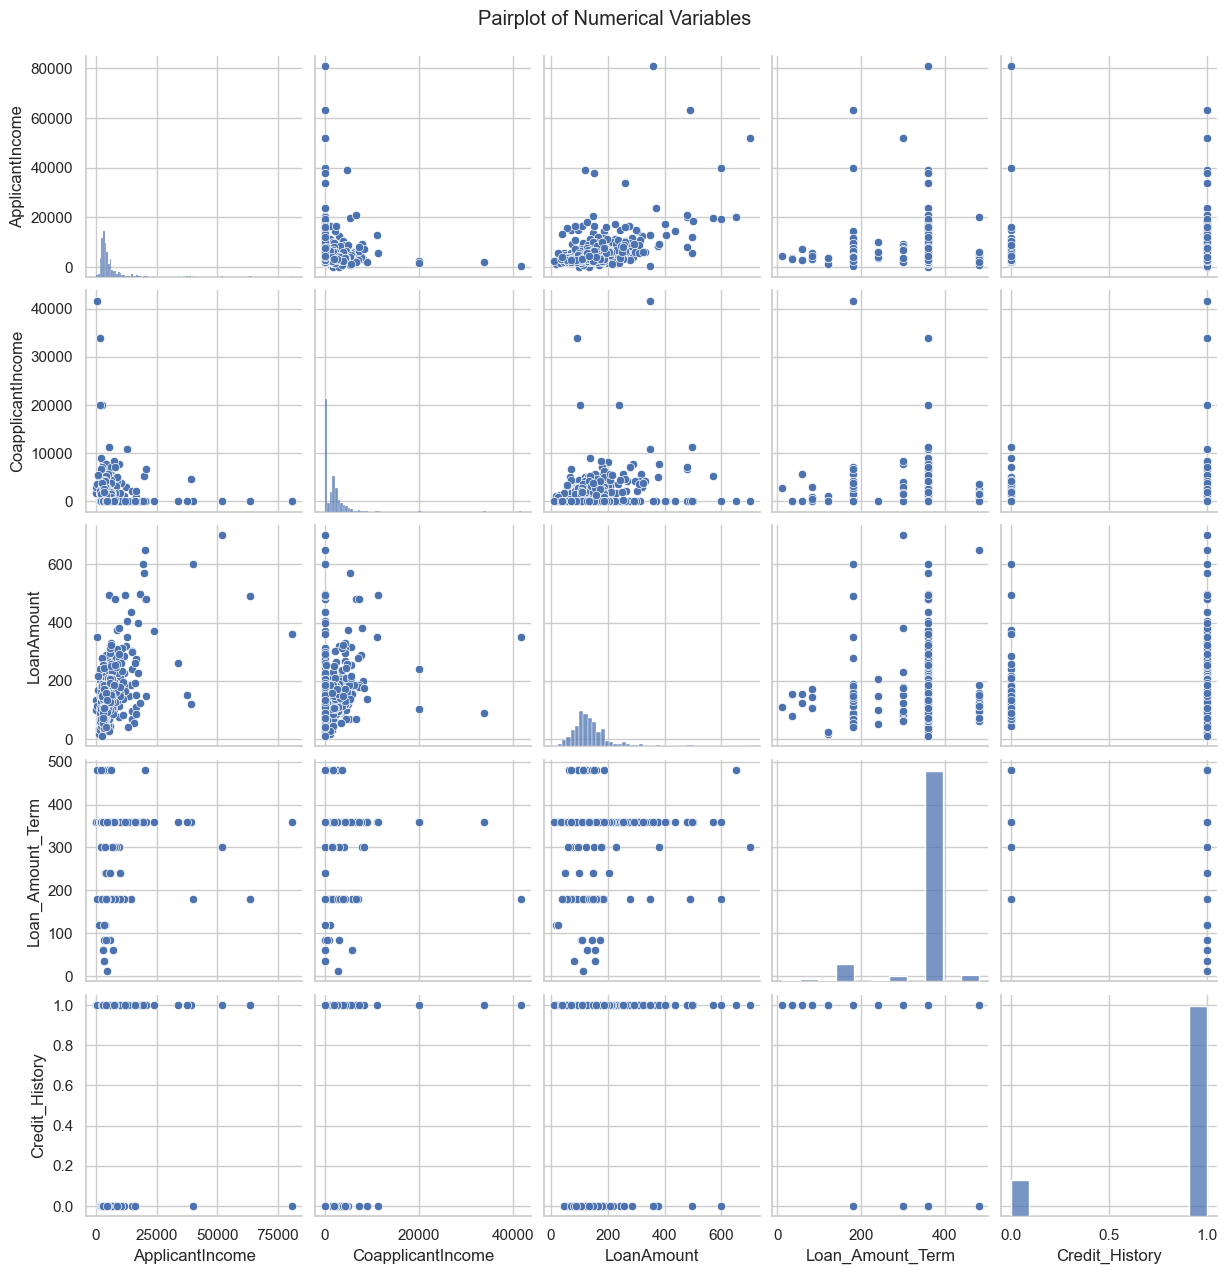

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Bar plot for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Pie chart for Married status
plt.figure(figsize=(8, 8))
df['Married'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Marital Status')
plt.show()

# Histogram for ApplicantIncome
plt.figure(figsize=(12, 8))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

# Boxplot for LoanAmount
plt.figure(figsize=(12, 8))
sns.boxplot(x='LoanAmount', data=df)
plt.title('Distribution of Loan Amount')
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


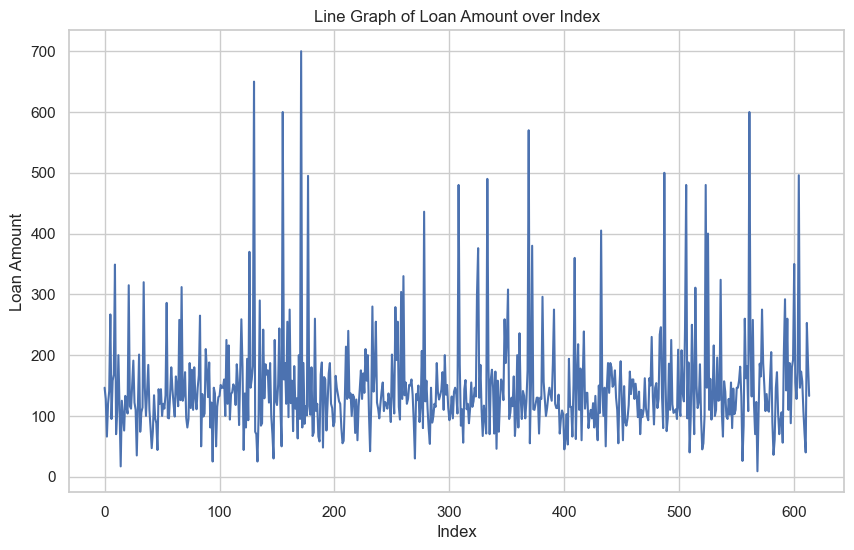

In [15]:
import matplotlib.pyplot as plt

# Line Graph for Loan Amount over Index
plt.figure(figsize=(10, 6))
plt.plot(df['LoanAmount'])
plt.title('Line Graph of Loan Amount over Index')
plt.xlabel('Index')
plt.ylabel('Loan Amount')
plt.show()


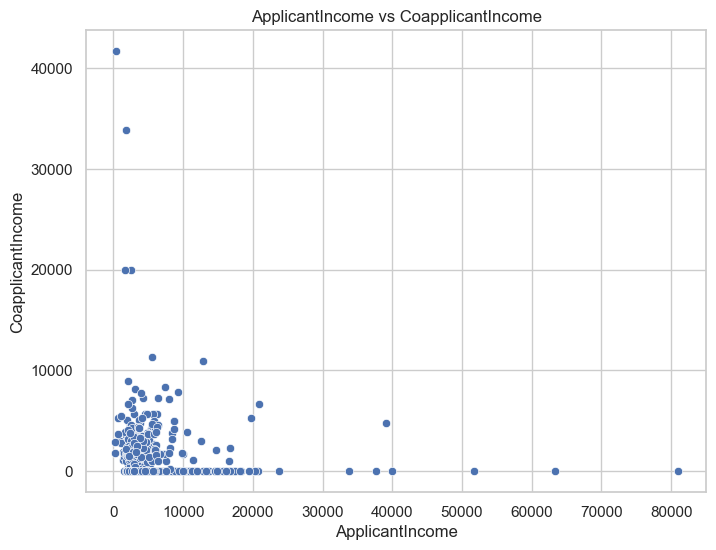

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=df)
plt.title('ApplicantIncome vs CoapplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()

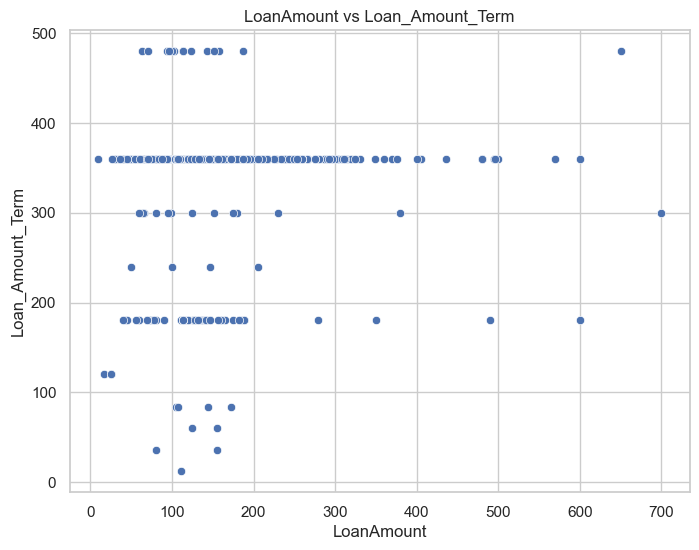

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', data=df)
plt.title('LoanAmount vs Loan_Amount_Term')
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')
plt.show()


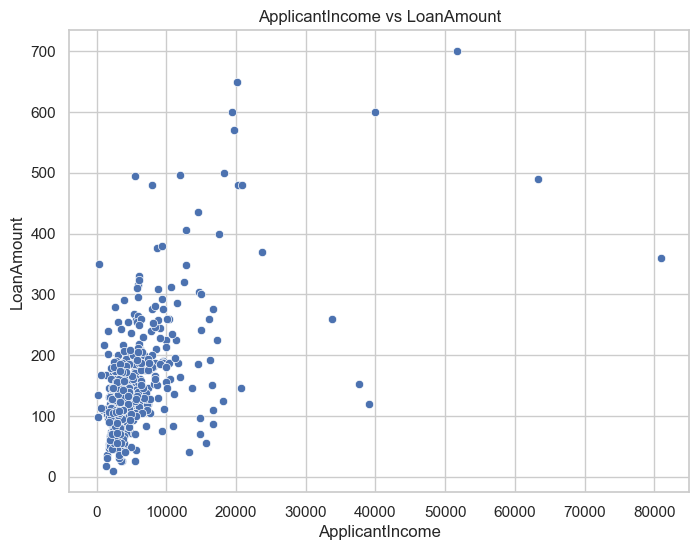

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('ApplicantIncome vs LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

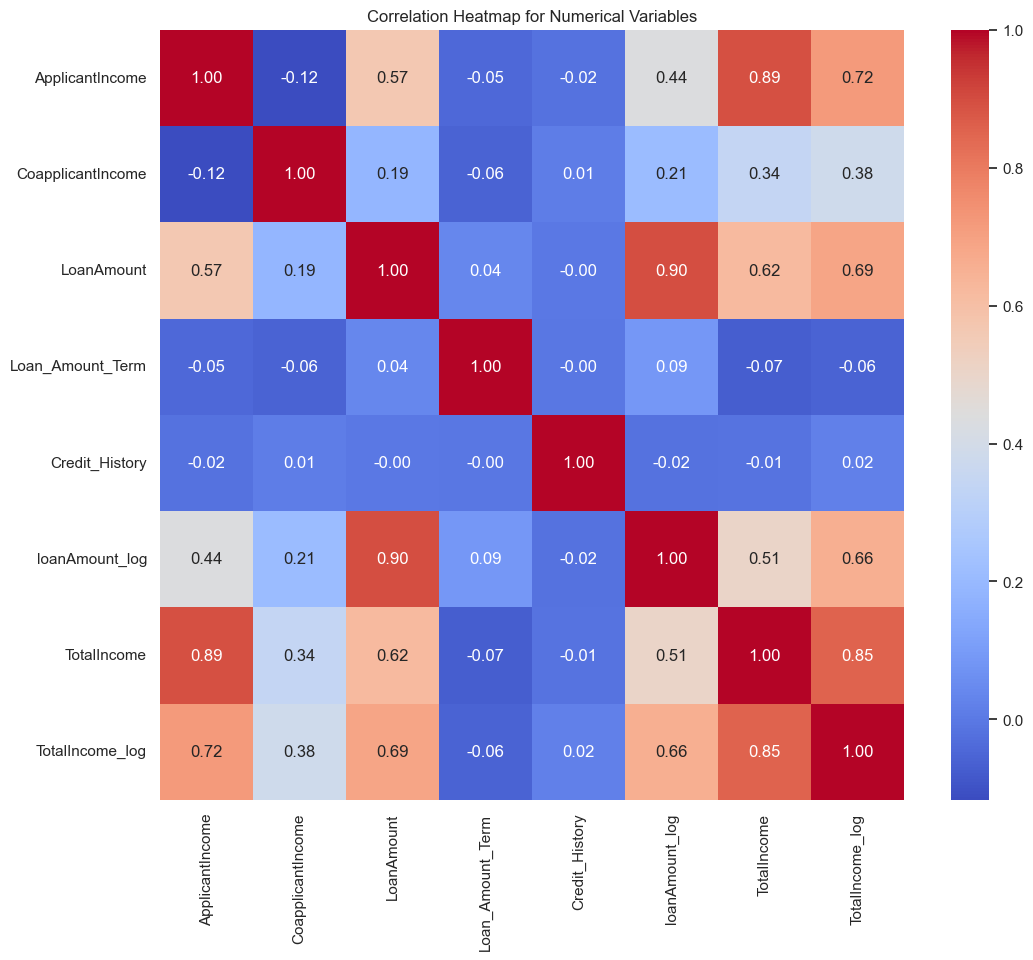

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a heatmap for numerical variables
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


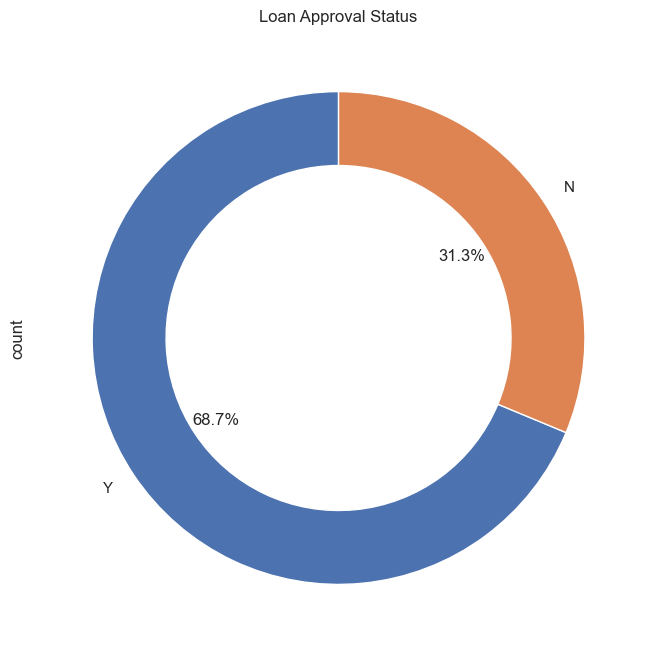

In [20]:
import matplotlib.pyplot as plt

# Donut Chart for Loan Approval Status
plt.figure(figsize=(8, 8))
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Loan Approval Status')
plt.show()


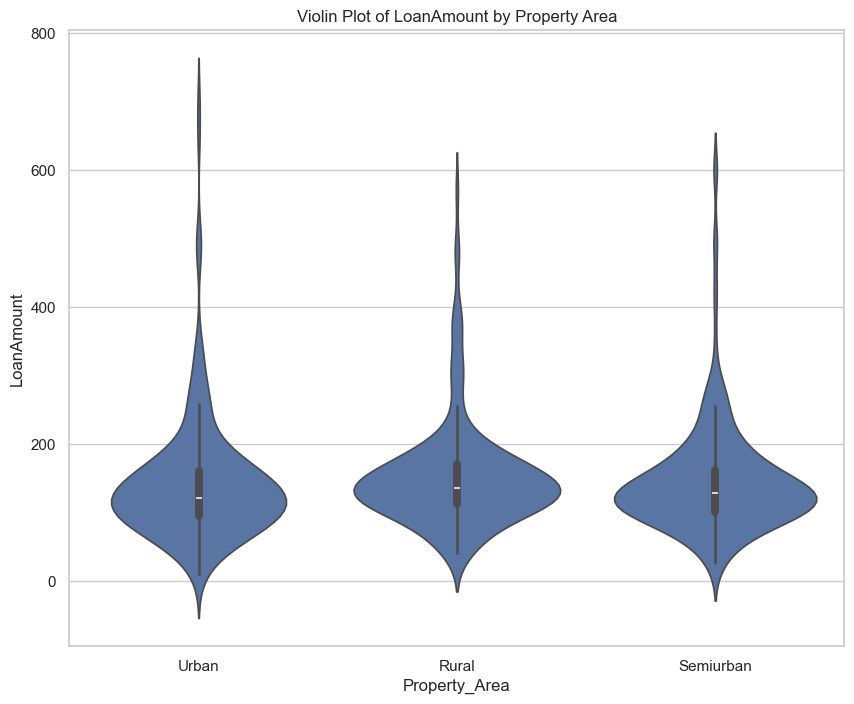

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plot for LoanAmount by Property Area
plt.figure(figsize=(10, 8))
sns.violinplot(x='Property_Area', y='LoanAmount', data=df)
plt.title('Violin Plot of LoanAmount by Property Area')
plt.show()


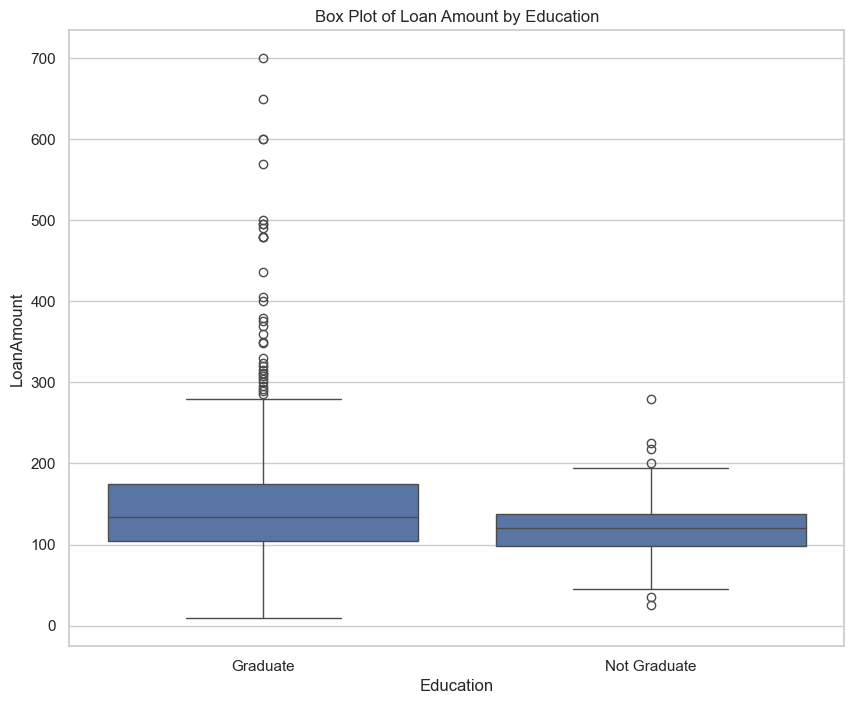

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot for Loan Amount by Education
plt.figure(figsize=(10, 8))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Box Plot of Loan Amount by Education')
plt.show()


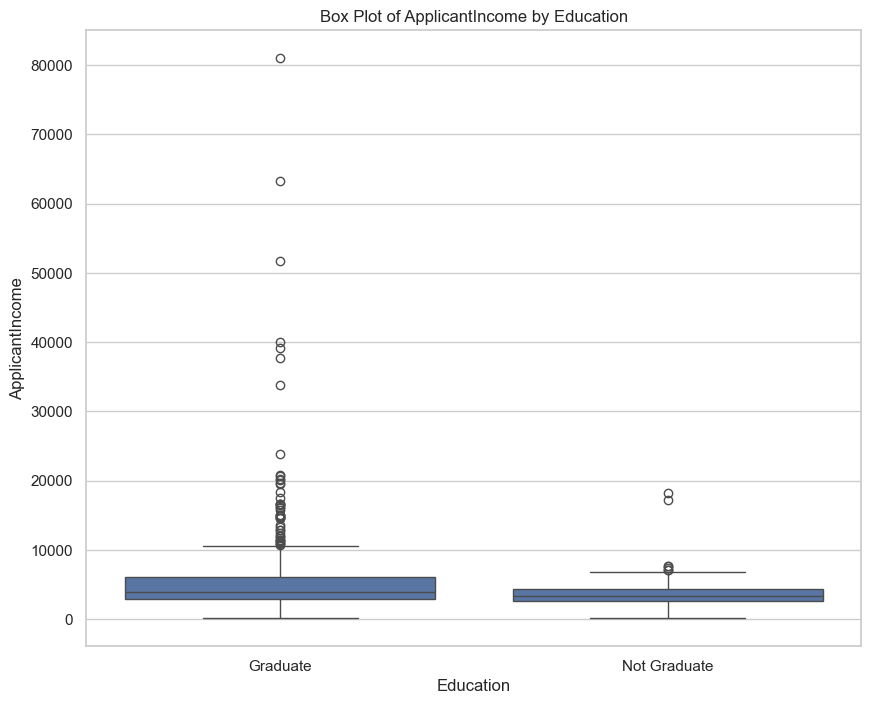

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot for ApplicantIncome by Education
plt.figure(figsize=(10, 8))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome by Education')
plt.show()


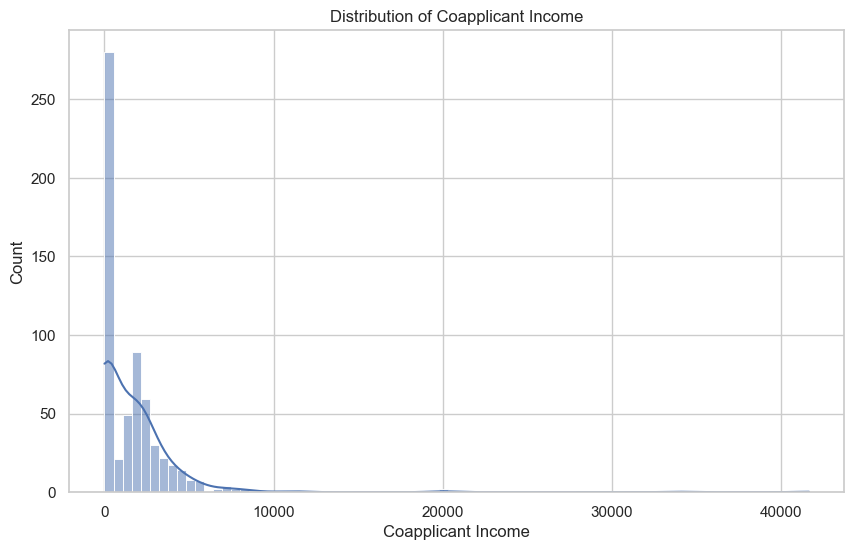

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution Plot for CoapplicantIncome
plt.figure(figsize=(10, 6))
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.show()


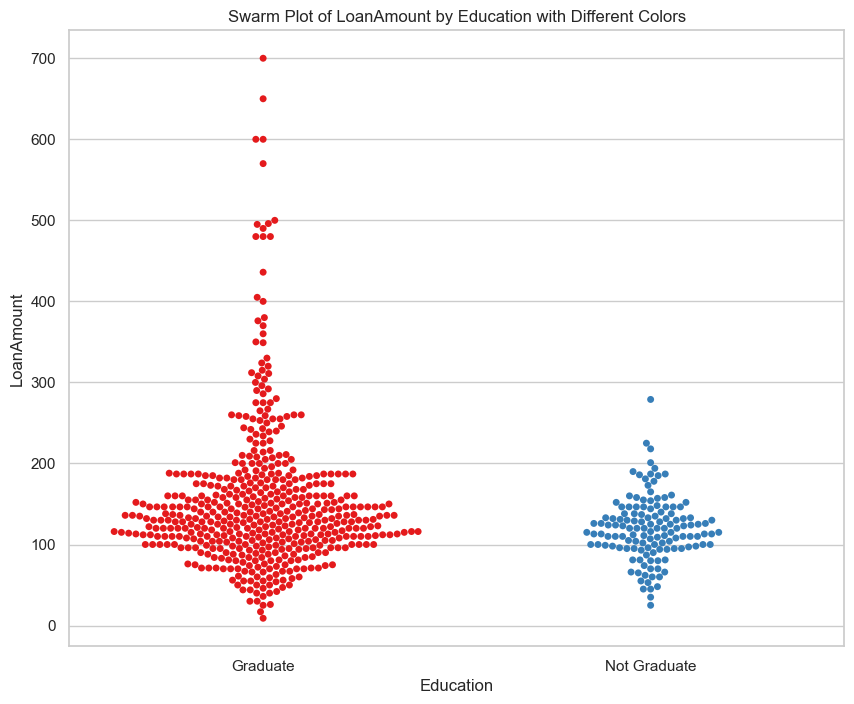

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Swarm Plot with different colors for LoanAmount by Education
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Education', y='LoanAmount', data=df, hue='Education', palette='Set1')
plt.title('Swarm Plot of LoanAmount by Education with Different Colors')
plt.show()


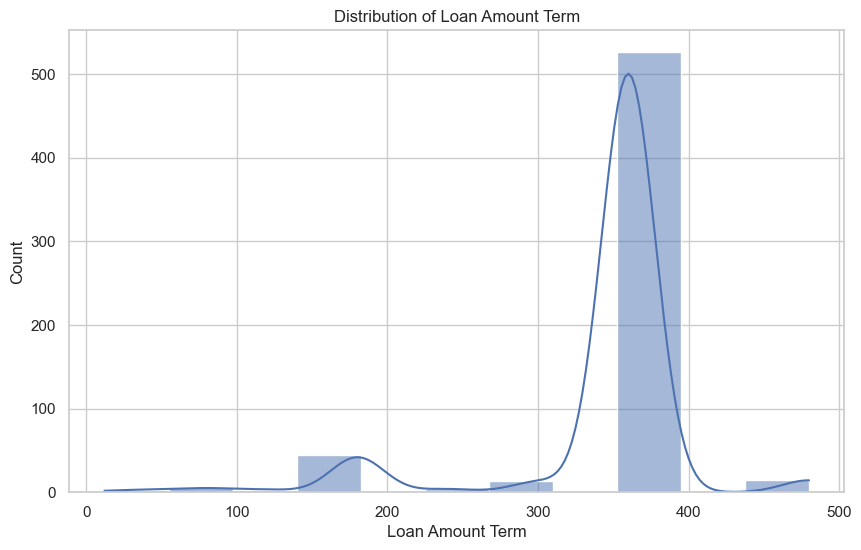

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution Plot for Loan_Amount_Term
plt.figure(figsize=(10, 6))
sns.histplot(df['Loan_Amount_Term'], kde=True)
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.show()


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,loanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,4.857444,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.495995,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.857444,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


In [28]:
x= df.iloc[:,np.r_[1:4,9:11,13:15]].values
y= df.iloc[:,12].values


x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [29]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

percentage of missing genders

In [30]:
print("per of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


No of people who take loan as a group by gender

number of people who take loan as a group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\rayya\AppData\Local\Temp\ipykernel_89616\2651572609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

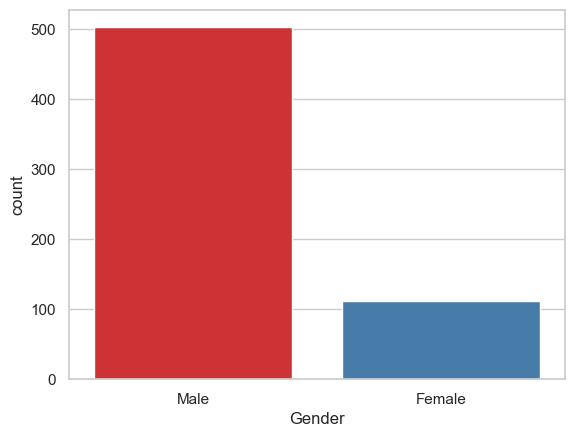

In [31]:
print("number of people who take loan as a group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1')

No of people who take loan as a group by marital status

C:\Users\rayya\AppData\Local\Temp\ipykernel_89616\1784934695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='Set1')


number of people who take loan as a group by marital status:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

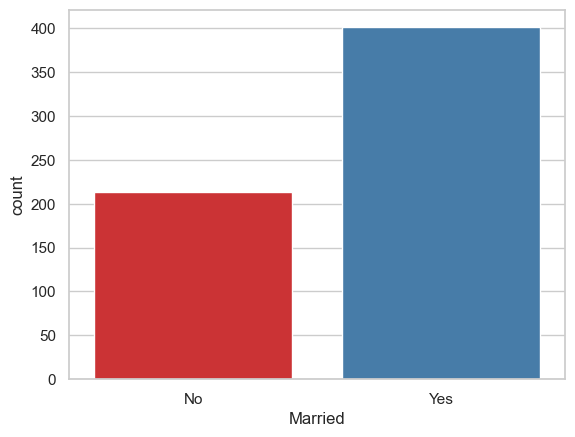

In [32]:
print("number of people who take loan as a group by marital status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set1')

No of people who take loan as a group by Dependents

number of people who take loan as a group by Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\rayya\AppData\Local\Temp\ipykernel_89616\2788073048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

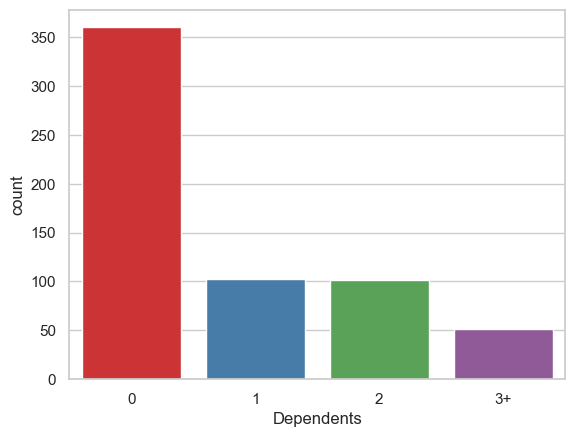

In [33]:
print("number of people who take loan as a group by Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette='Set1')

No of people who take loan as a group by Self employed

number of people who take loan as a group by Self employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


C:\Users\rayya\AppData\Local\Temp\ipykernel_89616\684944747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

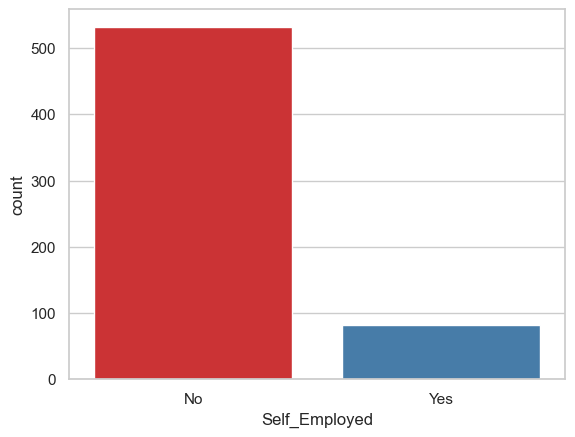

In [34]:
print("number of people who take loan as a group by Self employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette='Set1')

No of people who take loan as a group by Loan Amount

number of people who take loan as a group by Loan Amount:
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


C:\Users\rayya\AppData\Local\Temp\ipykernel_89616\1000134689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df, palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

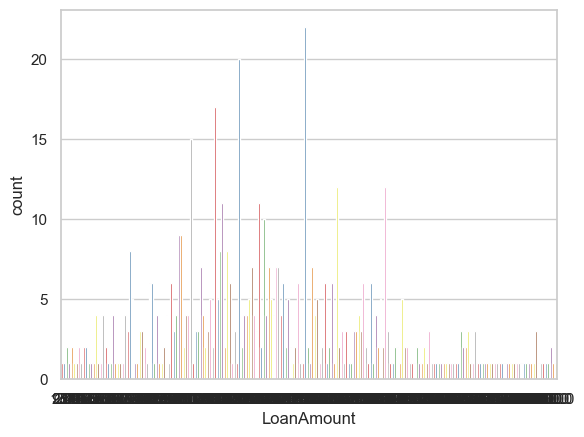

In [35]:
print("number of people who take loan as a group by Loan Amount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette='Set1')

No of people who take loan as a group by Loan Amount

number of people who take loan as a group by Credit History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


C:\Users\rayya\AppData\Local\Temp\ipykernel_89616\1636030732.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette='Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

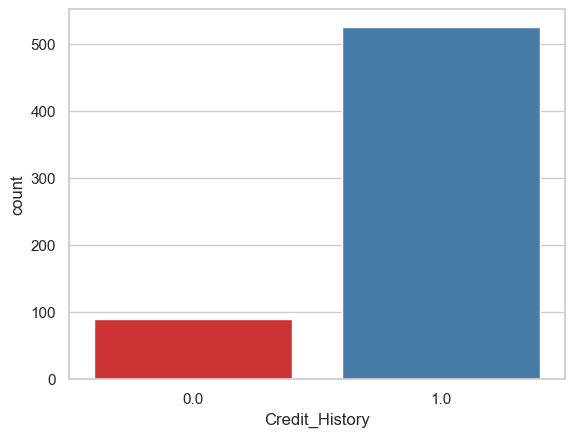

In [36]:
print("number of people who take loan as a group by Credit History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette='Set1')

Trending And Testing

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_X=LabelEncoder()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line for actual vs predicted values
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual LoanAmount')
plt.ylabel('Predicted LoanAmount')
plt.title('Regression Plot: Actual vs Predicted LoanAmount')
plt.show()


In [38]:
for i in range(0,5):
    X_train[:,i]=LabelEncoder_X.fit_transform(X_train[:,i])
    X_train[:,6]=LabelEncoder_X.fit_transform(X_train[:,6])

X_train

array([[1, 1, 0, ..., 1, 4.875197323201151, 267],
       [1, 0, 1, ..., 1, 5.278114659230517, 407],
       [1, 1, 0, ..., 0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1, 5.298317366548036, 363],
       [1, 1, 0, ..., 1, 5.075173815233827, 273],
       [0, 1, 0, ..., 1, 5.204006687076795, 301]], dtype=object)

In [39]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)

y_train


array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [40]:
for i in range(0,5):
    X_test[:,i]=LabelEncoder_X.fit_transform(X_test[:,i])
    X_test[:,6]=LabelEncoder_X.fit_transform(X_test[:,6])

X_test

array([[1, 0, 0, 5, 1, 4.430816798843313, 85],
       [0, 0, 0, 5, 1, 4.718498871295094, 28],
       [1, 1, 0, 5, 1, 5.780743515792329, 104],
       [1, 1, 0, 5, 1, 4.700480365792417, 80],
       [1, 1, 2, 5, 1, 4.574710978503383, 22],
       [1, 1, 0, 3, 0, 5.10594547390058, 70],
       [1, 1, 3, 3, 1, 5.056245805348308, 77],
       [1, 0, 0, 5, 1, 6.003887067106539, 114],
       [1, 0, 0, 5, 0, 4.820281565605037, 53],
       [1, 1, 0, 5, 1, 4.852030263919617, 55],
       [0, 0, 0, 5, 1, 4.430816798843313, 4],
       [1, 1, 1, 5, 1, 4.553876891600541, 2],
       [0, 0, 0, 5, 1, 5.634789603169249, 96],
       [1, 1, 2, 5, 1, 5.4638318050256105, 97],
       [1, 1, 0, 5, 1, 4.564348191467836, 117],
       [1, 1, 1, 5, 1, 4.204692619390966, 22],
       [1, 0, 1, 5, 1, 5.247024072160486, 32],
       [1, 0, 0, 5, 1, 4.882801922586371, 25],
       [0, 0, 0, 5, 1, 4.532599493153256, 1],
       [1, 1, 0, 5, 0, 5.198497031265826, 44],
       [0, 1, 0, 5, 0, 4.787491742782046, 71],
       [1, 1,

In [41]:
LabelEncoder_y=LabelEncoder()
y_test=LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [42]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

1 denote approval of loan
0 denote rejection of loan

In [44]:
from sklearn import metrics
y_pred=rf_clf.predict(X_test)
print('accuracy of random forest classifier is',metrics.accuracy_score(y_pred,y_test))

y_pred

accuracy of random forest classifier is 0.7804878048780488


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)



GaussianNB()

In [46]:
y_pred=nb_clf.predict(X_test)
print("accuracy of naive bayes is",metrics.accuracy_score(y_pred,y_test))

accuracy of naive bayes is 0.8292682926829268


In [47]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

Decission Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred=dt_clf.predict(X_test)
print("accuracy of Decision tree classifier is",metrics.accuracy_score(y_pred,y_test))


accuracy of Decision tree classifier is 0.6910569105691057


In [50]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [51]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred=kn_clf.predict(X_test)
print("accuracy of KNeighbour classifier is",metrics.accuracy_score(y_pred,y_test))

accuracy of KNeighbour classifier is 0.7967479674796748


In [53]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from your previous work

# Instantiate the regression model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.14181838626562054


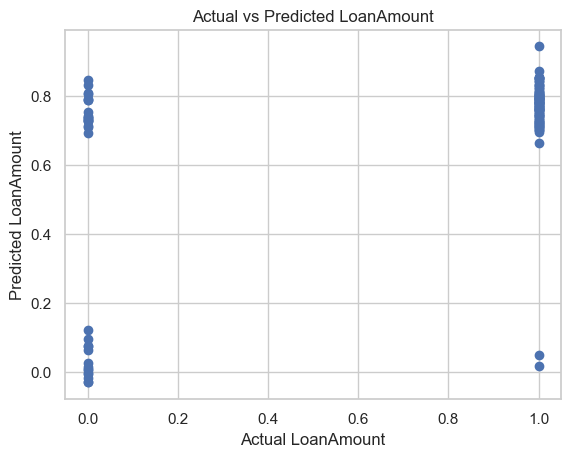

In [58]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual LoanAmount')
plt.ylabel('Predicted LoanAmount')
plt.title('Actual vs Predicted LoanAmount')
plt.show()


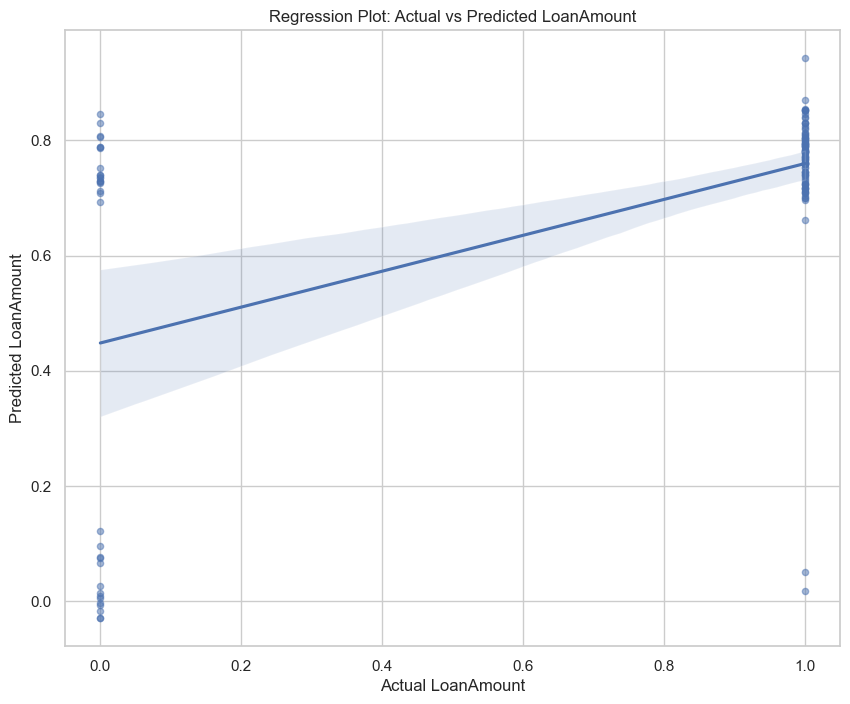

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line for actual vs predicted values
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.xlabel('Actual LoanAmount')
plt.ylabel('Predicted LoanAmount')
plt.title('Regression Plot: Actual vs Predicted LoanAmount')
plt.show()


so from the above classifiers we can use Naive Bayes classifier for loan approval prediction since its accuracy is high